# Week 10 & 11

**Name:** I Adarsh *(PG-12)*<br>
**Registration Number:** 240905294<br>
**Date:** 08/04/2025

In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [101]:
df = pd.read_csv('Heart_monitoring.csv')
df.head()

,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,...,High LDL Cholesterol,Alcohol Consumption,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Heart Disease Status
0,56.0,Male,153.0,155.0,High,Yes,Yes,No,24.991591,Yes,...,No,High,Medium,7.633228,Medium,342.0,NaN,12.969246,12.387250,No
1,69.0,Female,146.0,286.0,High,No,Yes,Yes,25.221799,No,...,No,Medium,High,8.744034,Medium,133.0,157.0,9.355389,19.298875,No
2,46.0,Male,126.0,216.0,Low,No,No,No,29.855447,No,...,Yes,Low,Low,4.440440,Low,393.0,92.0,12.709873,11.230926,No
3,32.0,Female,122.0,293.0,High,Yes,Yes,No,24.130477,Yes,...,Yes,Low,High,5.249405,High,293.0,94.0,12.509046,5.961958,No
4,60.0,Male,166.0,242.0,Low,Yes,Yes,Yes,20.486289,Yes,...,No,Low,High,7.030971,High,263.0,154.0,10.381259,8.153887,No


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   9971 non-null   float64
 1   Gender                9981 non-null   object 
 2   Blood Pressure        9981 non-null   float64
 3   Cholesterol Level     9970 non-null   float64
 4   Exercise Habits       9975 non-null   object 
 5   Smoking               9975 non-null   object 
 6   Family Heart Disease  9979 non-null   object 
 7   Diabetes              9970 non-null   object 
 8   BMI                   9978 non-null   float64
 9   High Blood Pressure   9974 non-null   object 
 10  Low HDL Cholesterol   9975 non-null   object 
 11  High LDL Cholesterol  9974 non-null   object 
 12  Alcohol Consumption   7414 non-null   object 
 13  Stress Level          9978 non-null   object 
 14  Sleep Hours           9975 non-null   float64
 15  Sugar Consumption   

## Question 1
Perform Data exploration of the attributes Blood Pressure, Cholestrol Level, Triglyceride Level, Fasting Blood Sugar, CRP Level, Homocysteine Level.

In [103]:
cols1 = ['Blood Pressure', 'Cholesterol Level', 'Triglyceride Level', 'Fasting Blood Sugar', 'CRP Level', 'Homocysteine Level']
df1 = df[cols1]

# five number summary
df1.describe()[3:]

,Blood Pressure,Cholesterol Level,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level
min,120.0,150.0,100.0,80.0,0.003647,5.000236
25%,134.0,187.0,176.0,99.0,3.674126,8.723334
50%,150.0,226.0,250.0,120.0,7.472164,12.409395
75%,165.0,263.0,326.0,141.0,11.255592,16.140564
max,180.0,300.0,400.0,160.0,14.997087,19.999037


In [104]:
# null values
df1.isnull().sum()

Blood Pressure         19
Cholesterol Level      30
Triglyceride Level     26
Fasting Blood Sugar    22
CRP Level              26
Homocysteine Level     20
dtype: int64

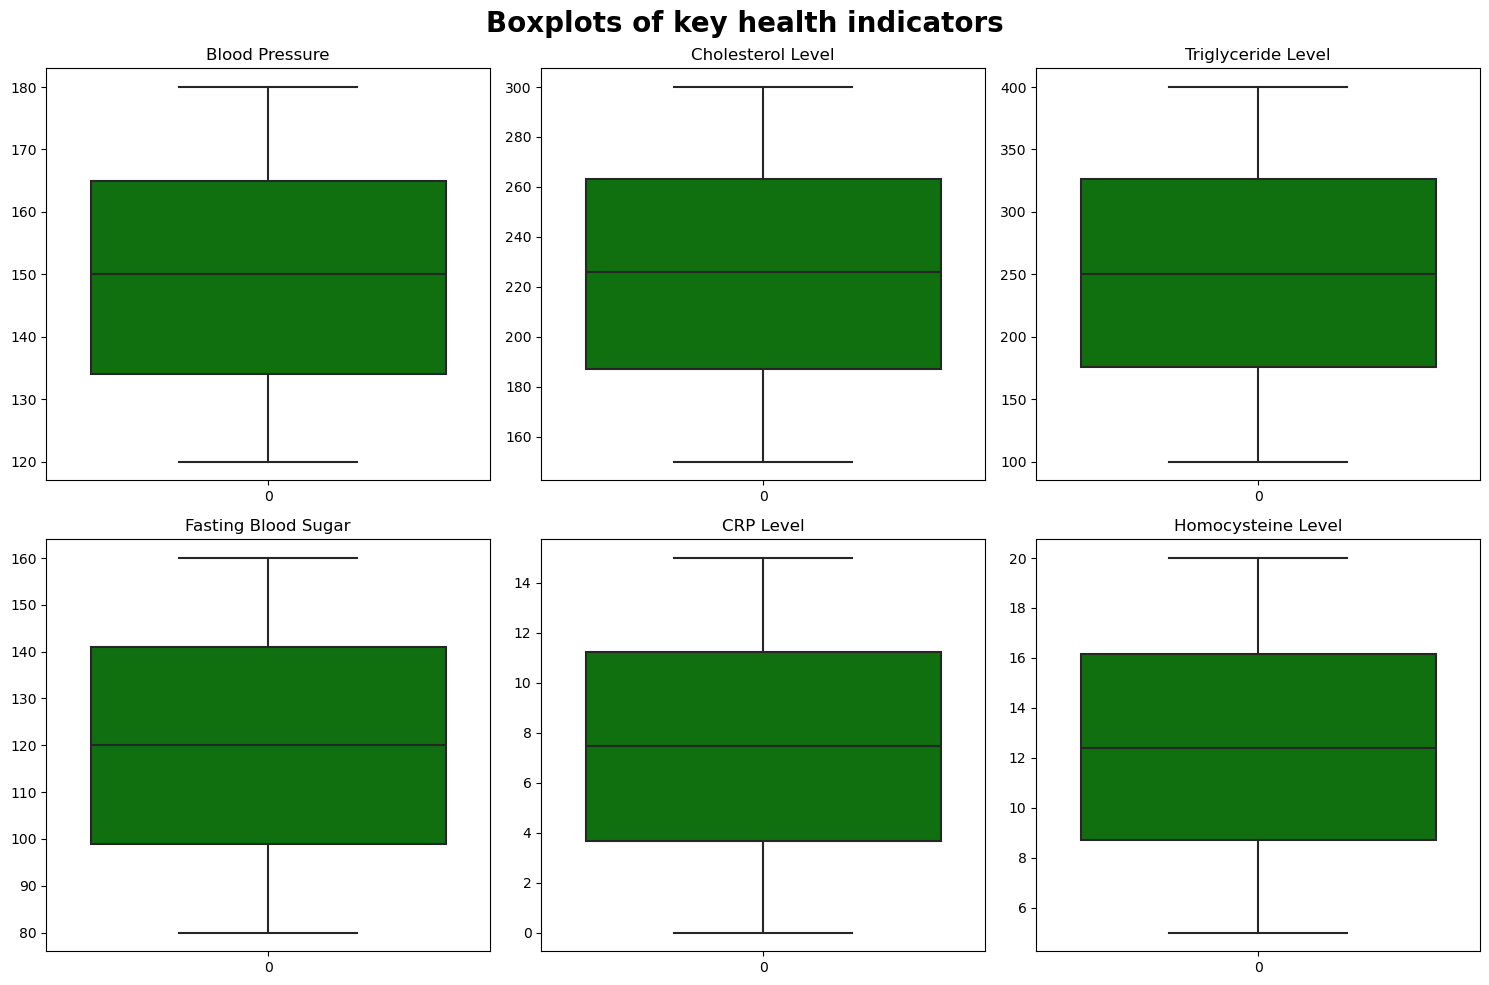

In [105]:
# Boxplots of each attribute
fig, ax = plt.subplots(nrows = 2, ncols = 3, figsize=(15, 10))
ax = ax.flatten()

for i, col in enumerate(cols1):
    sns.boxplot(df1[col], ax=ax[i], color='green')
    ax[i].set_title(col)

fig.suptitle('Boxplots of key health indicators', fontsize=20, fontweight='bold')

plt.tight_layout()
plt.show()

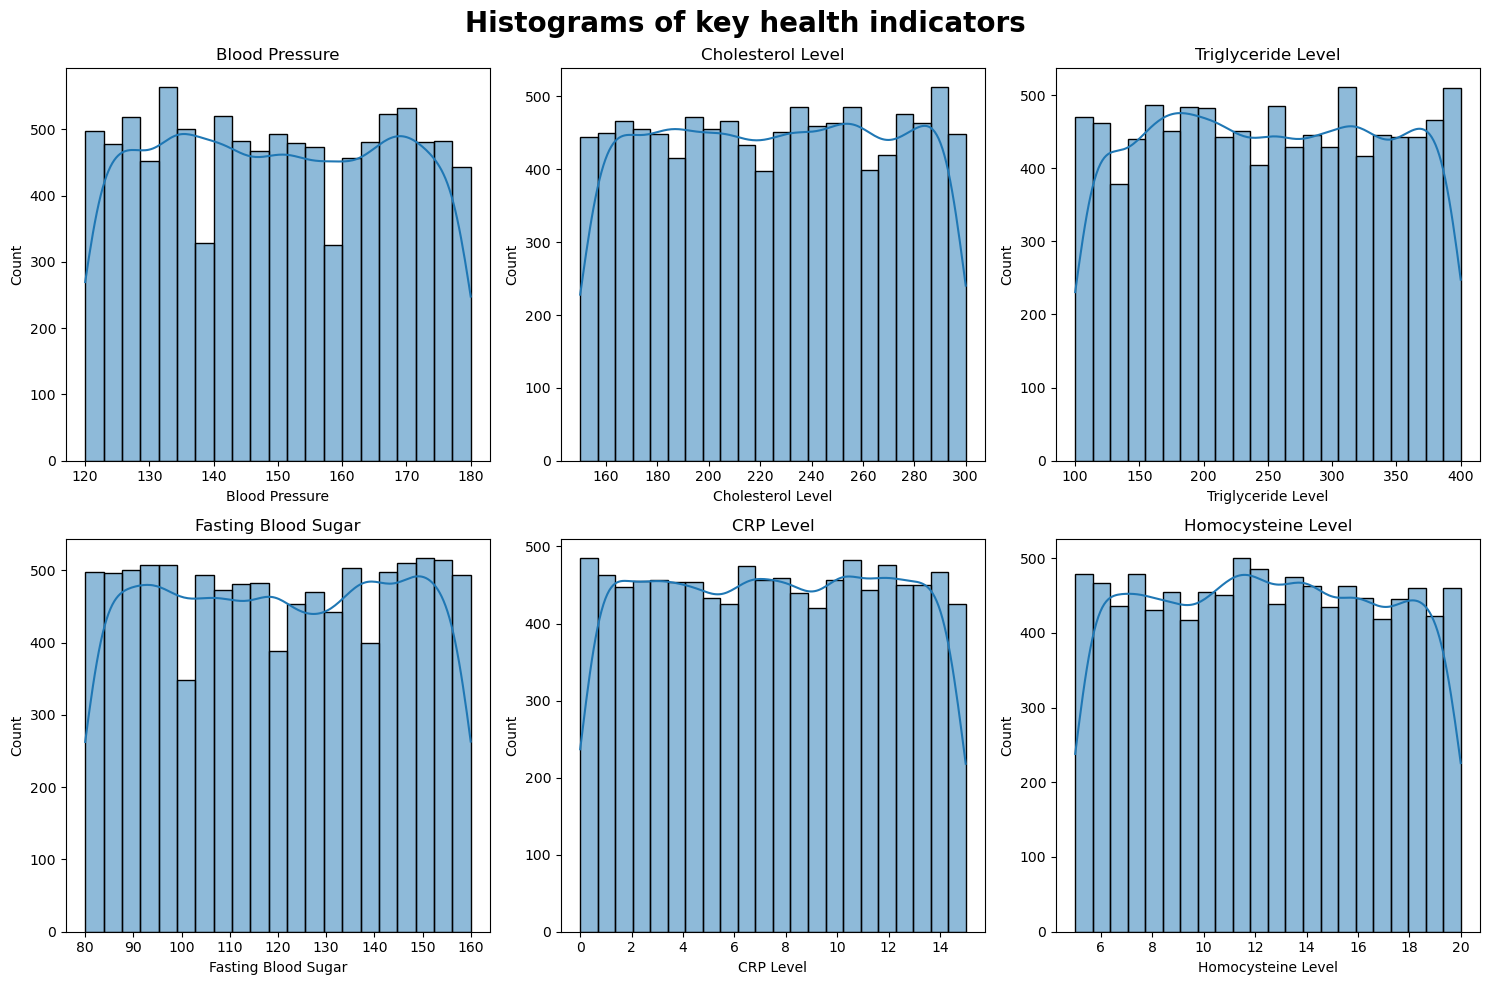

In [106]:
# Histograms of each attribute
fig, ax = plt.subplots(nrows = 2, ncols = 3, figsize=(15, 10))
ax = ax.flatten()

for i, col in enumerate(cols1):
    sns.histplot(df1[col], kde=True, ax=ax[i])
    ax[i].set_title(col)

fig.suptitle('Histograms of key health indicators', fontsize=20, fontweight='bold')

plt.tight_layout()
plt.show()

<Axes: >

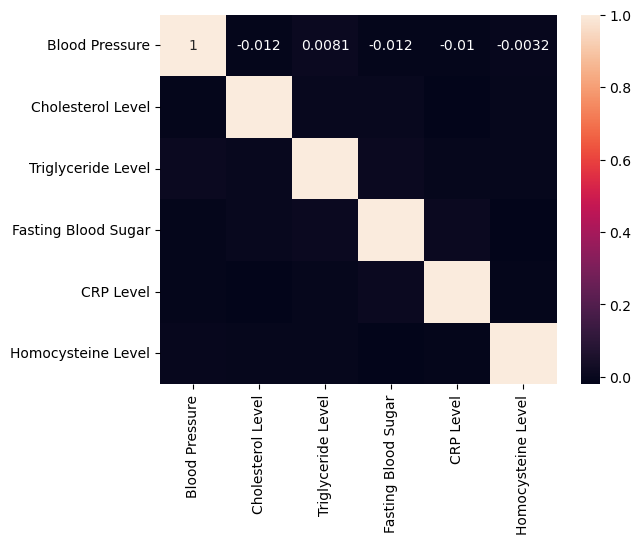

In [107]:
# Heatmap for correlation between attributes
sns.heatmap(df1.corr(), annot=True)

## Question 2
Perform the necessary cleaning, in terms of missing and noisy data. Summarize the data before and after cleaning.

In [108]:
# Five number summary before cleaning
df.describe()[3:]

,Age,Blood Pressure,Cholesterol Level,BMI,Sleep Hours,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level
min,18.0,120.0,150.0,18.002837,4.000605,100.0,80.0,0.003647,5.000236
25%,34.0,134.0,187.0,23.658075,5.449866,176.0,99.0,3.674126,8.723334
50%,49.0,150.0,226.0,29.079492,7.003252,250.0,120.0,7.472164,12.409395
75%,65.0,165.0,263.0,34.520015,8.531577,326.0,141.0,11.255592,16.140564
max,80.0,180.0,300.0,39.996954,9.999952,400.0,160.0,14.997087,19.999037


In [109]:
# Check for outliers using IQR
numerical_cols = df.select_dtypes(include=['number']).columns.tolist()
q1 = df[numerical_cols].quantile(0.25)
q3 = df[numerical_cols].quantile(0.75)
iqr = q3 - q1

lo = q1 - 1.5 * iqr
up = q3 + 1.5 * iqr

outliers = df[((df[numerical_cols] < lo) | (df[numerical_cols] > up)).any(axis=1)]
outliers

,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,...,High LDL Cholesterol,Alcohol Consumption,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Heart Disease Status


No outliers are present.

In [110]:
# Null values in the data
df.isnull().sum()

Age                       29
Gender                    19
Blood Pressure            19
Cholesterol Level         30
Exercise Habits           25
Smoking                   25
Family Heart Disease      21
Diabetes                  30
BMI                       22
High Blood Pressure       26
Low HDL Cholesterol       25
High LDL Cholesterol      26
Alcohol Consumption     2586
Stress Level              22
Sleep Hours               25
Sugar Consumption         30
Triglyceride Level        26
Fasting Blood Sugar       22
CRP Level                 26
Homocysteine Level        20
Heart Disease Status       0
dtype: int64

In [111]:
# Fill in categorical columns using mode, numeric columns using median
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].fillna(df[col].mode()[0])
    else:
        df[col] = df[col].fillna(df[col].median())

In [112]:
# Null values after cleaning
df.isnull().sum()

Age                     0
Gender                  0
Blood Pressure          0
Cholesterol Level       0
Exercise Habits         0
Smoking                 0
Family Heart Disease    0
Diabetes                0
BMI                     0
High Blood Pressure     0
Low HDL Cholesterol     0
High LDL Cholesterol    0
Alcohol Consumption     0
Stress Level            0
Sleep Hours             0
Sugar Consumption       0
Triglyceride Level      0
Fasting Blood Sugar     0
CRP Level               0
Homocysteine Level      0
Heart Disease Status    0
dtype: int64

In [113]:
# Five number summary after cleaning
df.describe()[3:]

,Age,Blood Pressure,Cholesterol Level,BMI,Sleep Hours,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level
min,18.0,120.0,150.0,18.002837,4.000605,100.0,80.0,0.003647,5.000236
25%,34.0,134.0,187.0,23.668887,5.455288,176.0,99.0,3.681800,8.729771
50%,49.0,150.0,226.0,29.079492,7.003252,250.0,120.0,7.472164,12.409395
75%,65.0,165.0,263.0,34.509009,8.527938,326.0,141.0,11.244879,16.130968
max,80.0,180.0,300.0,39.996954,9.999952,400.0,160.0,14.997087,19.999037


## Question 3
Perform exploratory data analysis using numpy, Pandas, Matplotlib and Seaborn to address the following:

### a. Distribution of attributes

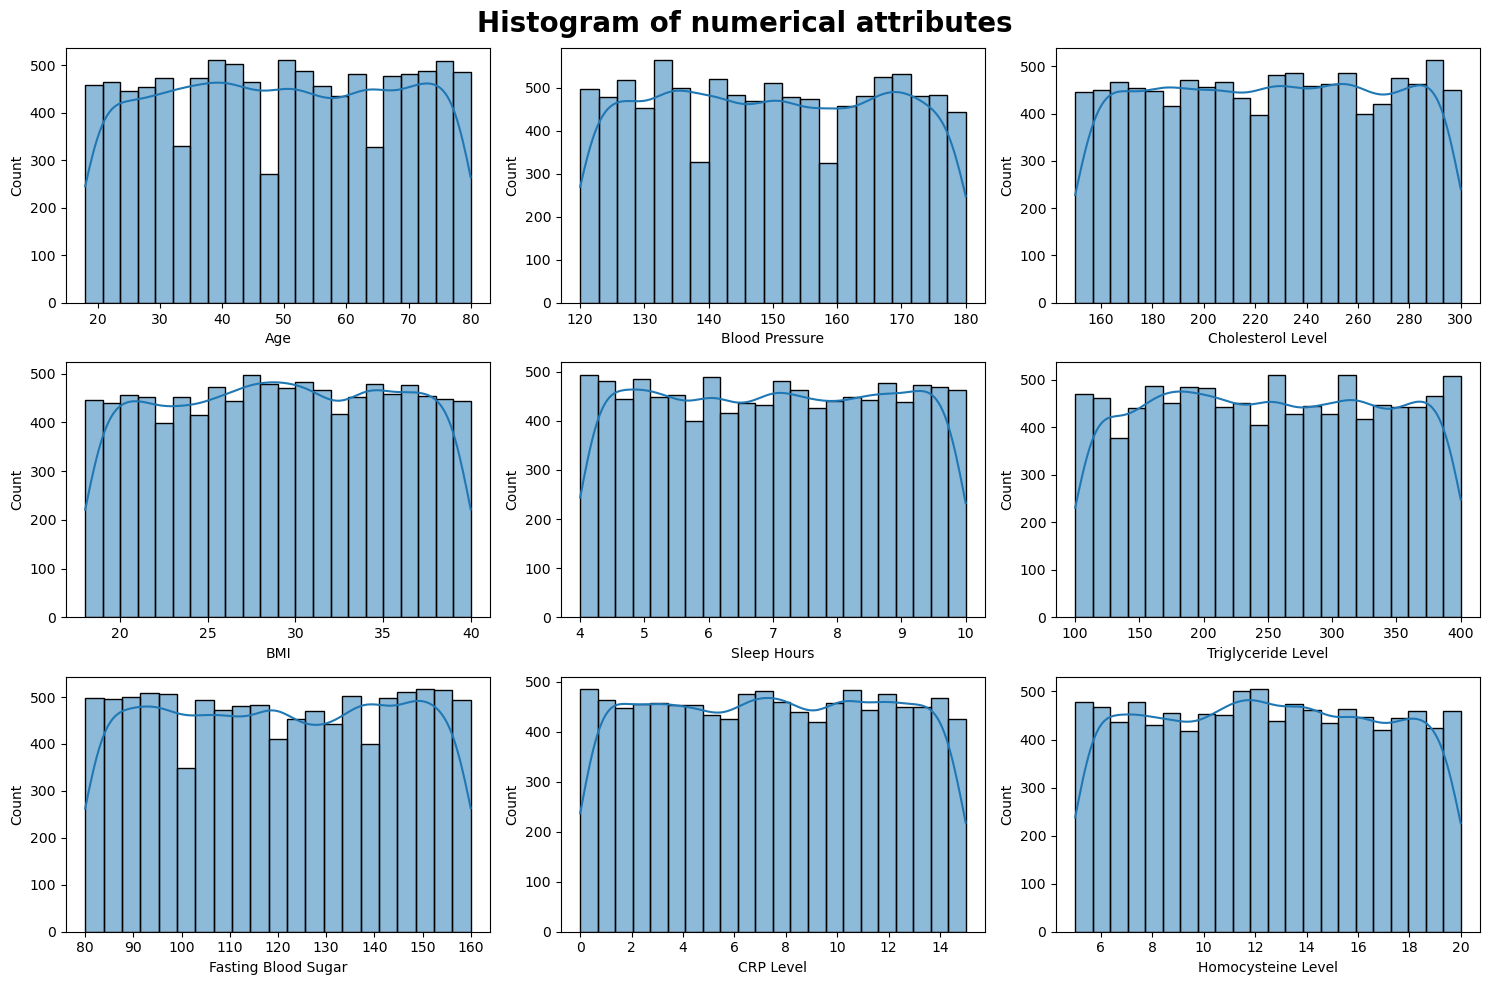

In [114]:
# Histogram of numerical attributes
numerical_cols = df.select_dtypes(include=['number']).columns.tolist()

fig, ax = plt.subplots(nrows = 3, ncols = 3, figsize=(15, 10))
ax = ax.flatten()
for i, col in enumerate(numerical_cols):
    sns.histplot(data = df, x = col, ax = ax[i], kde=True)

fig.suptitle('Histogram of numerical attributes', fontsize=20, fontweight='bold')
plt.tight_layout()

In [115]:
# Checking for skewness
df.skew(numeric_only=True)

Age                   -0.006657
Blood Pressure         0.013842
Cholesterol Level     -0.007250
BMI                   -0.021368
Sleep Hours            0.000121
Triglyceride Level     0.006216
Fasting Blood Sugar   -0.008885
CRP Level             -0.004074
Homocysteine Level     0.007959
dtype: float64

In [116]:
# Categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

for col in categorical_cols:
    print(f"{df[col].value_counts()}\n")

Gender
Male      5022
Female    4978
Name: count, dtype: int64

Exercise Habits
High      3397
Medium    3332
Low       3271
Name: count, dtype: int64

Smoking
Yes    5148
No     4852
Name: count, dtype: int64

Family Heart Disease
No     5025
Yes    4975
Name: count, dtype: int64

Diabetes
No     5048
Yes    4952
Name: count, dtype: int64

High Blood Pressure
Yes    5048
No     4952
Name: count, dtype: int64

Low HDL Cholesterol
Yes    5025
No     4975
Name: count, dtype: int64

High LDL Cholesterol
No     5062
Yes    4938
Name: count, dtype: int64

Alcohol Consumption
Medium    5086
Low       2488
High      2426
Name: count, dtype: int64

Stress Level
Medium    3409
Low       3320
High      3271
Name: count, dtype: int64

Sugar Consumption
Low       3420
High      3330
Medium    3250
Name: count, dtype: int64

Heart Disease Status
No     8000
Yes    2000
Name: count, dtype: int64



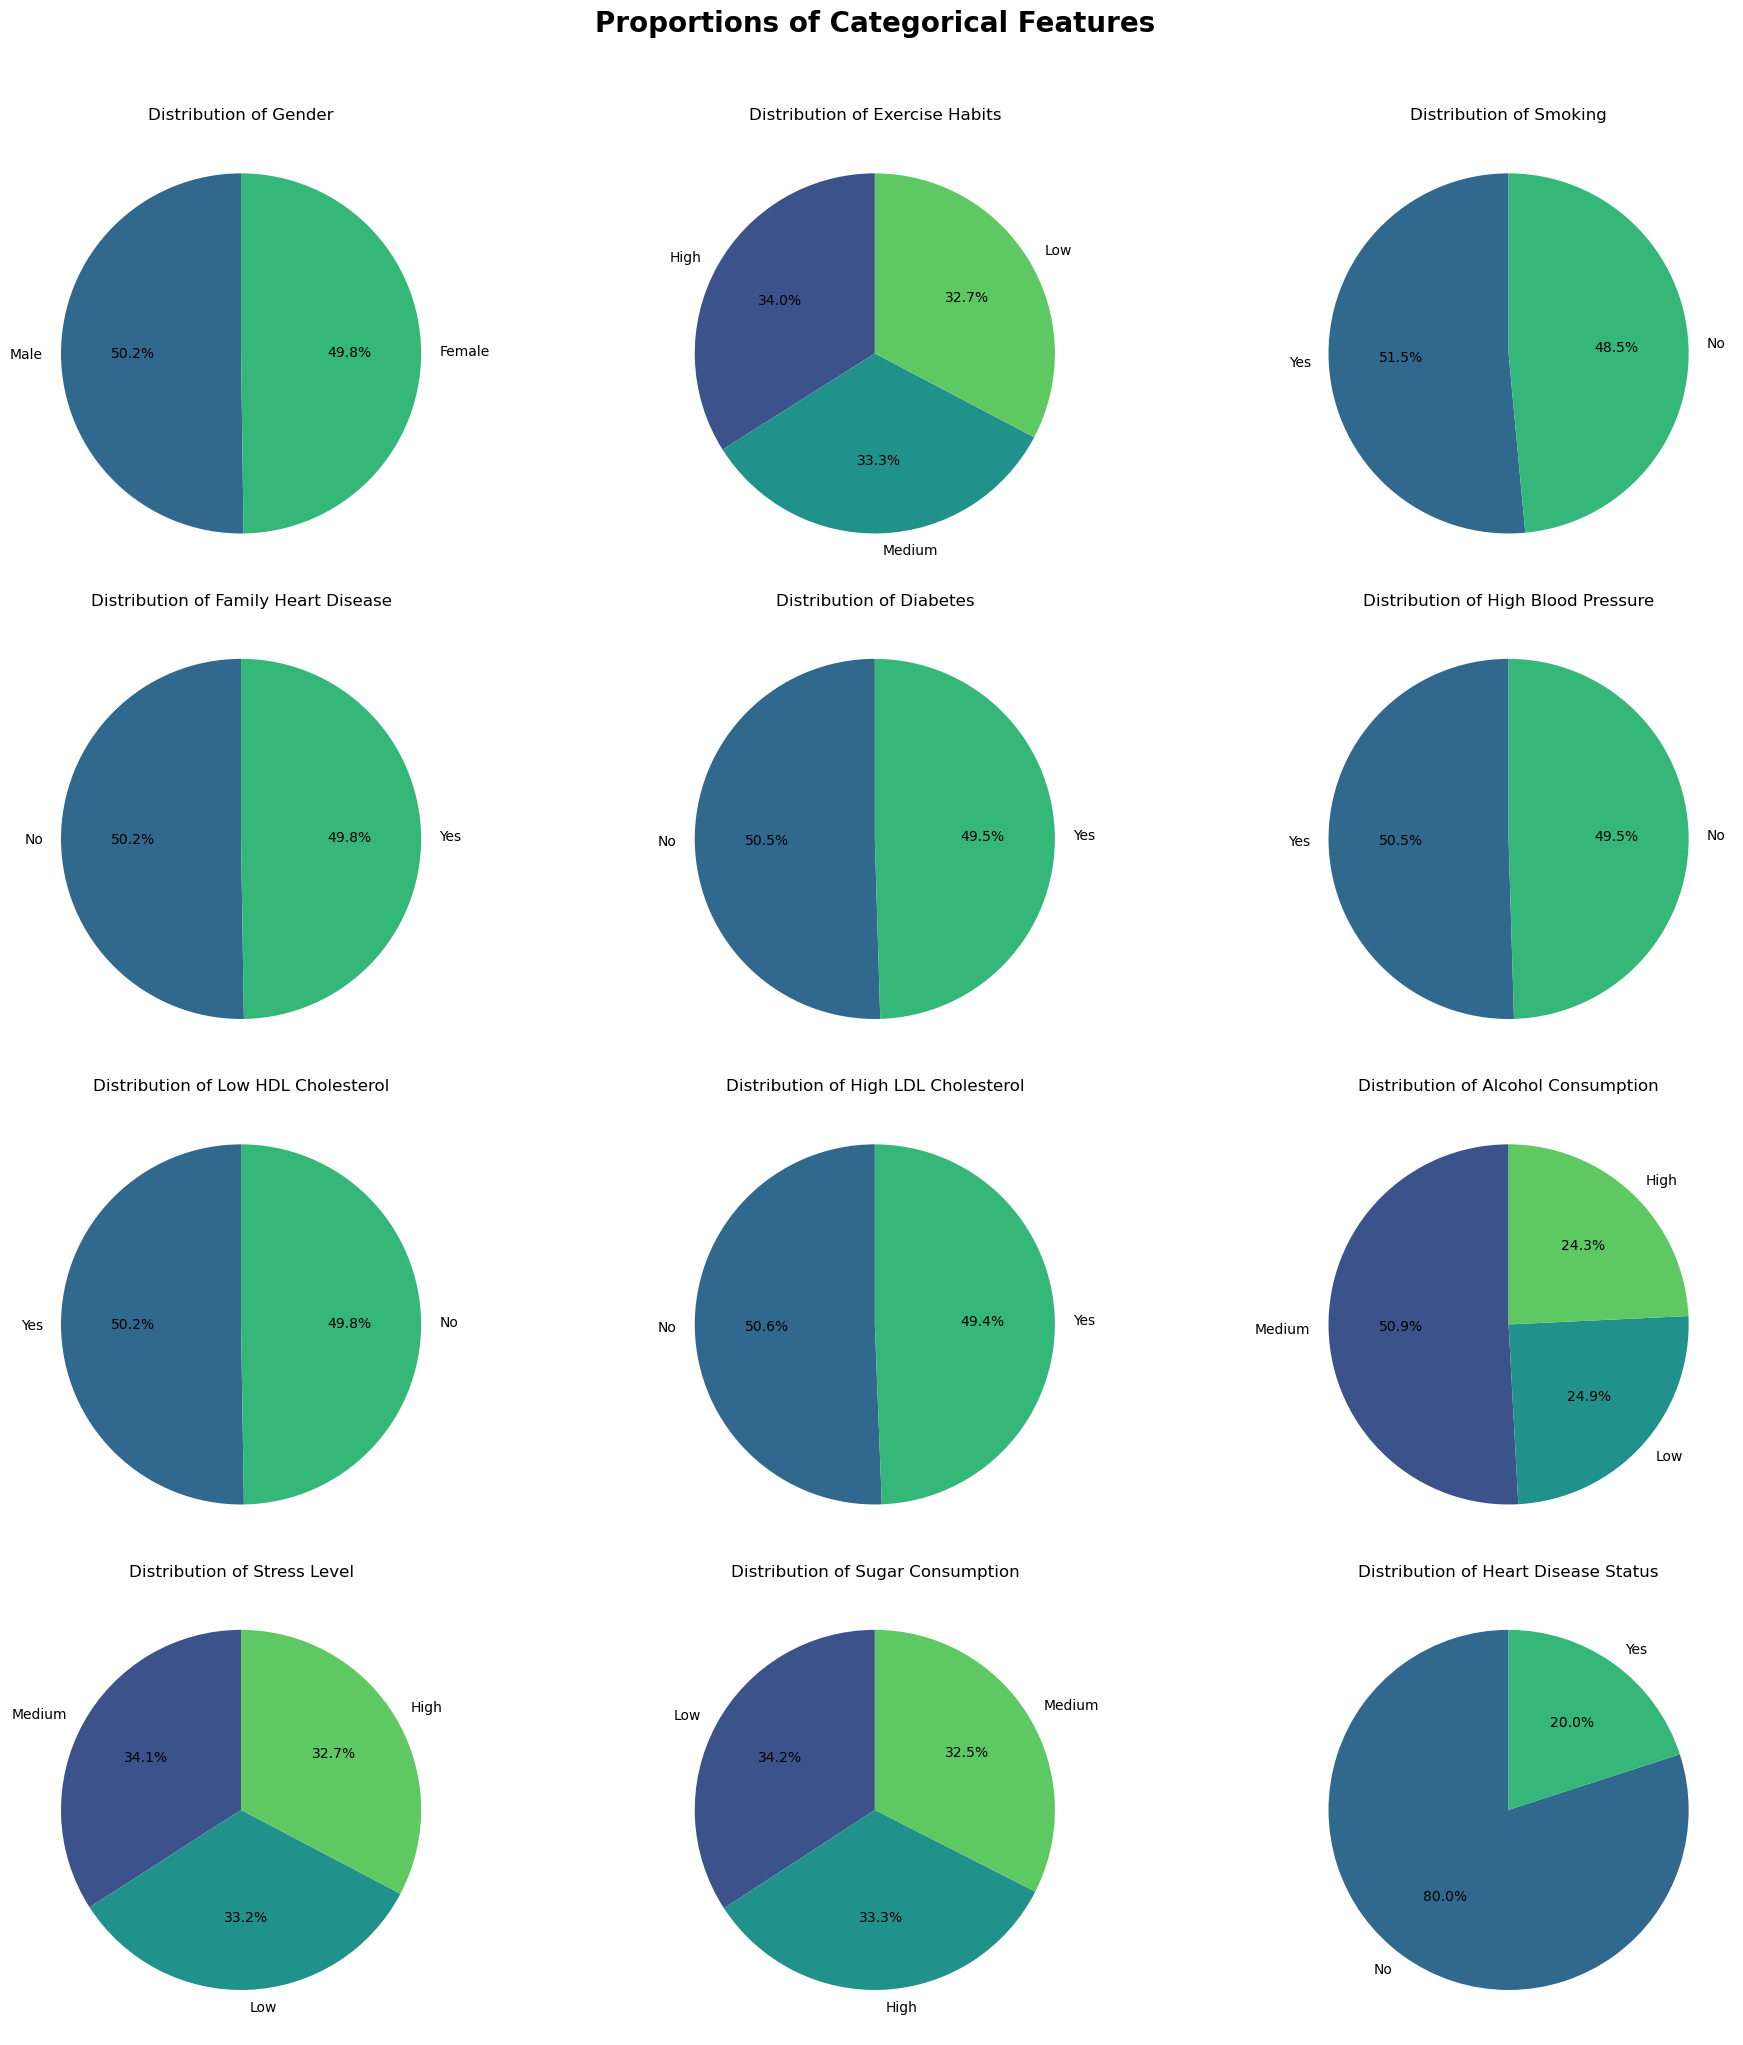

In [117]:
# Pie charts of categorical columns
fig, ax = plt.subplots(nrows=4, ncols=3, figsize=(20, 20))
ax = ax.flatten()

# Create subplots for each categorical feature
for i, col in enumerate(categorical_cols):
    value_counts = df[col].value_counts()
    labels = value_counts.index
    sizes = value_counts.values
    
    ax[i].pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('viridis', len(labels)))
    ax[i].set_title(f"Distribution of {col}")

fig.suptitle('Proportions of Categorical Features', fontsize=20, y=1.02, fontweight='bold')

plt.tight_layout()
plt.show()

### b. Correlation among attributes

Text(0.5, 0, 'Gender')

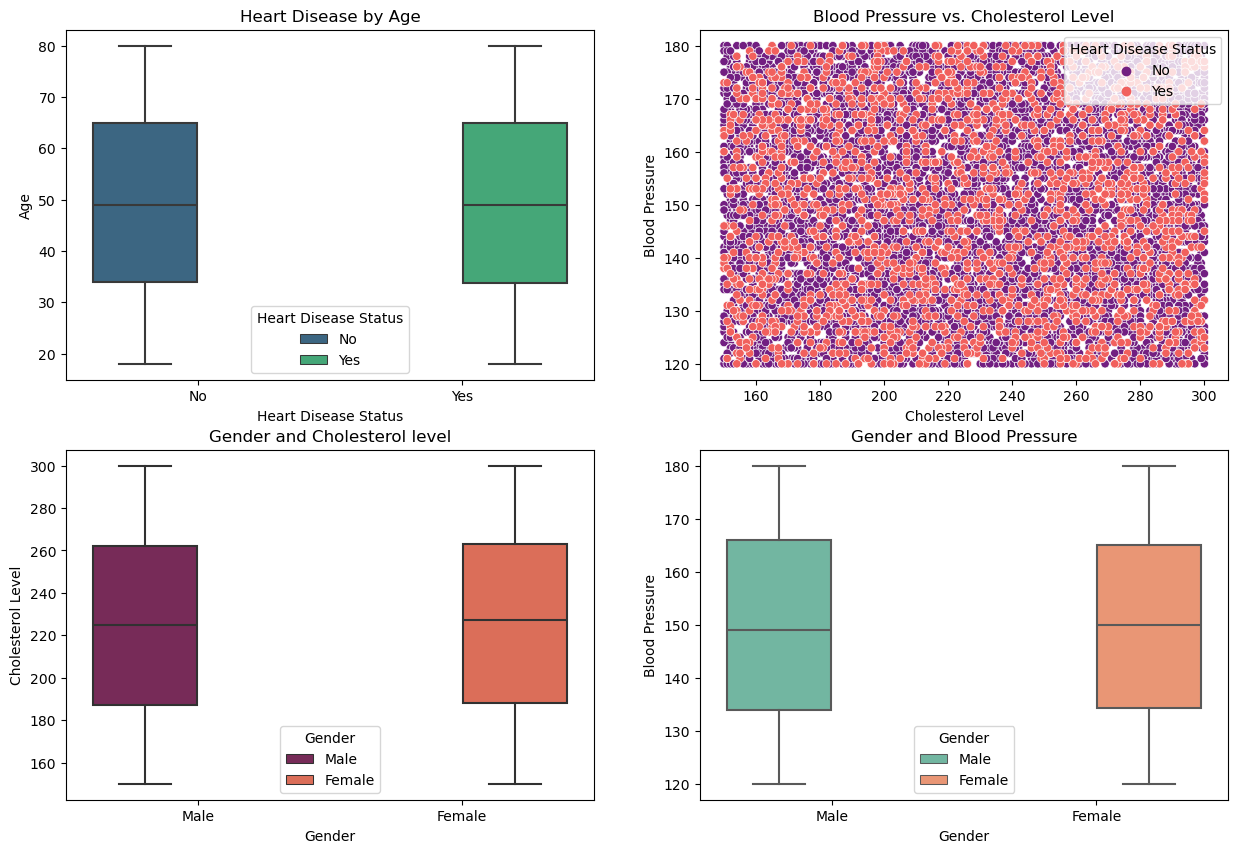

In [118]:
fig, ax = plt.subplots(nrows = 2, ncols =2, figsize = (15, 10))
ax = ax.flatten()

# How does age correlate with heart disease risk?
sns.boxplot(data=df, x='Heart Disease Status', y='Age', palette='viridis', hue='Heart Disease Status', ax=ax[0])
ax[0].set_title('Heart Disease by Age')
ax[0].set_xlabel('Heart Disease Status')

# Is there a relation between cholestrol levels and blood pressure?
sns.scatterplot(data=df, x='Cholesterol Level', y='Blood Pressure', palette='magma', hue='Heart Disease Status', ax=ax[1], legend='full')
ax[1].set_title('Blood Pressure vs. Cholesterol Level')
ax[1].set_xlabel('Cholesterol Level')

# Does gender affect cholestrol levels or blood pressure?
sns.boxplot(data=df, x='Gender', y='Cholesterol Level', palette='rocket', hue ='Gender', ax= ax[2])
ax[2].set_title('Gender and Cholesterol level')
ax[2].set_xlabel('Gender')

sns.boxplot(data=df, x='Gender', y='Blood Pressure', palette='Set2', hue ='Gender', ax= ax[3])
ax[3].set_title('Gender and Blood Pressure')
ax[3].set_xlabel('Gender')

### c. Analysing feature interactions

Text(0, 0.5, 'Blood Pressure')

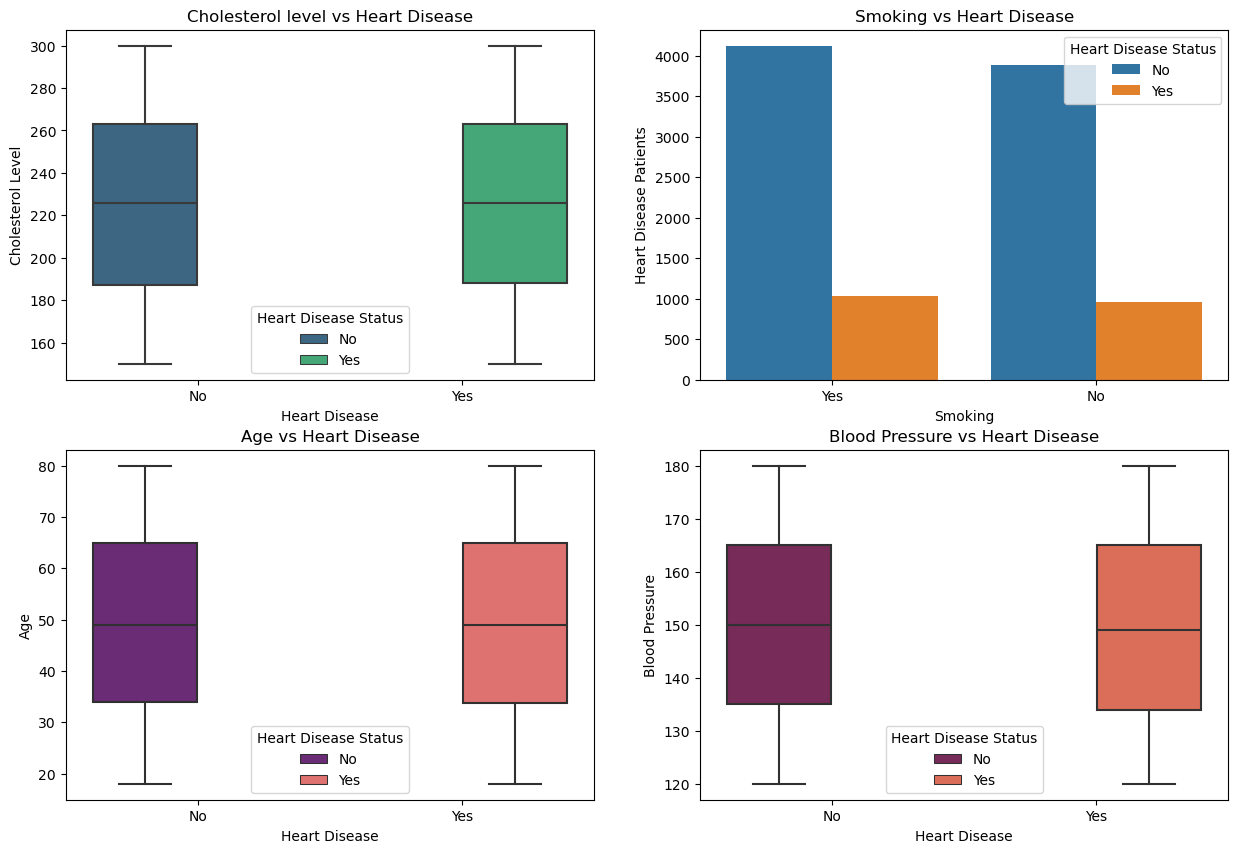

In [119]:
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (15, 10))
ax = ax.flatten()

# Do higher cholestrol levels indicate a higher risk of heart disease?
sns.boxplot(data=df, x='Heart Disease Status', y='Cholesterol Level', ax=ax[0], palette='viridis', hue='Heart Disease Status')
ax[0].set_title('Cholesterol level vs Heart Disease')
ax[0].set_xlabel('Heart Disease')
ax[0].set_ylabel('Cholesterol Level')

# How does smoking status affect heart disease occurrence?
sns.countplot(data=df, x='Smoking', hue='Heart Disease Status', ax=ax[1])
ax[1].set_title('Smoking vs Heart Disease')
ax[1].set_xlabel('Smoking')
ax[1].set_ylabel('Heart Disease Patients')

# Do older individuals with high blood pressure have a significantly higher risk?
sns.boxplot(data=df, x='Heart Disease Status', y='Age', ax=ax[2], palette='magma', hue='Heart Disease Status')
ax[2].set_title('Age vs Heart Disease')
ax[2].set_xlabel('Heart Disease')
ax[2].set_ylabel('Age')

sns.boxplot(data=df, x='Heart Disease Status', y='Blood Pressure', ax=ax[3], palette='rocket', hue='Heart Disease Status')
ax[3].set_title('Blood Pressure vs Heart Disease')
ax[3].set_xlabel('Heart Disease')
ax[3].set_ylabel('Blood Pressure')

In [120]:
# Converting categorical columns to numerical
df['Gender'] = df['Gender'].replace({'Male': 0, 'Female':1})
df['Exercise Habits'] = df['Exercise Habits'].replace({'High': 3, 'Medium':2, 'Low':1})
df['Alcohol Consumption'] = df['Alcohol Consumption'].replace({'High': 3, 'Medium':2, 'Low':1})
df['Stress Level'] = df['Stress Level'].replace({'High': 3, 'Medium':2, 'Low':1})
df['Sugar Consumption'] = df['Sugar Consumption'].replace({'High': 3, 'Medium':2, 'Low':1})

for col in ['Smoking', 'Family Heart Disease', 'Diabetes', 'High Blood Pressure', 'Low HDL Cholesterol', 'High LDL Cholesterol', 'Heart Disease Status']:
    df[col] = df[col].replace({'Yes': 1, 'No':0})

<Axes: >

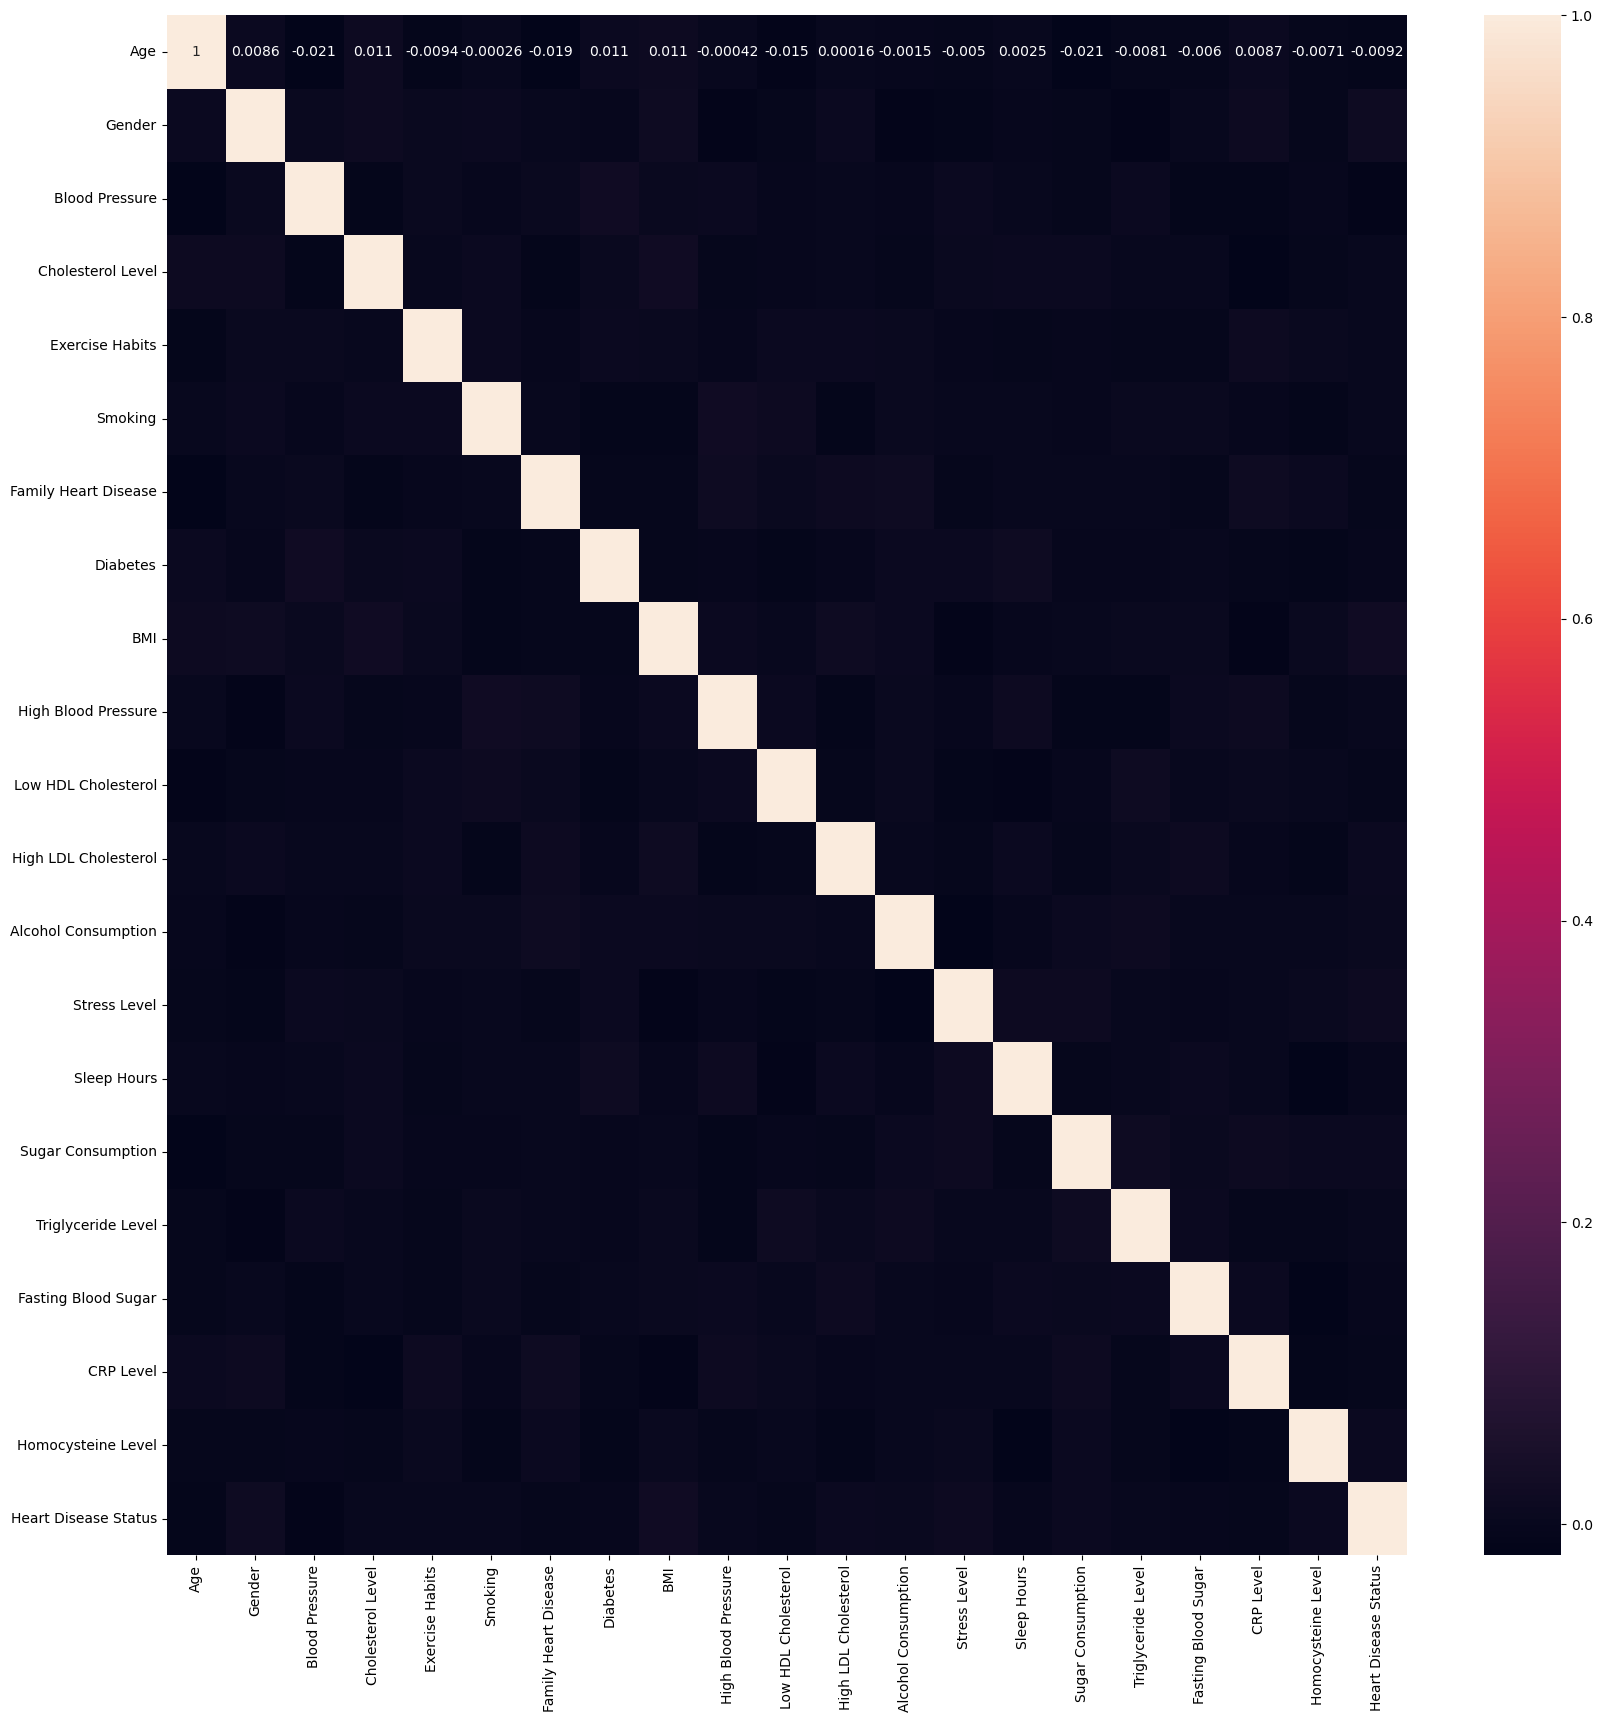

In [121]:
# Heatmap for checking correlation between any pair of features
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), annot=True)